# Group 6

# Projectile with Euler's method

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Init parameters



In [ ]:
# initial parameters

# inital speed (shooting speed)
u = 13

# shooting angle (in degree)
theta = 45

# timestep length (small time period for earh loop)
dt = 0.0001

# number of timestep (number of iteration)
N = 50000

# acceleration vector
# no horizontal acceleration -> ax = 0
# gravity -> ay = -9.8
acc = np.array([0, -9.8])

sx_max = 0


Calculate initial speed in x and y axis

In [ ]:
ux = u * np.cos(theta/180 * np.pi)
uy = u * np.sin(theta/180 * np.pi)
print(ux, uy)

9.19238815542512 9.192388155425117


Create and init the arrays of position and velocities

In [ ]:
# 2D array for storing x, y of each timestep
# pos[i] = [x, y]
# vel[i] = [vx, vy]
pos = np.zeros((N+1, 2)) 
vel = np.zeros((N+1, 2))

# first row: inital position and velocity
# pos[0] = [0, 0]
pos[0] = np.array([0,0])

# vel[0] = [Ux, Uy] = [U_COS_theta, U_SIN_theta]
vel[0] = np.array([ux, uy])

Looping for the Euler's Method to calculate position and velocity

In [ ]:
for i in range (0, N):
  vel[i+1] = vel[i] + acc * dt
  pos[i+1] = pos[i] + vel[i] * dt
  if pos[i+1, 1] <= 0:
    sx_max = pos[i+1, 0]
    break

print(pos)

[[0.         0.        ]
 [0.00091924 0.00091924]
 [0.00183848 0.00183838]
 ...
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]


Ploting x-y position

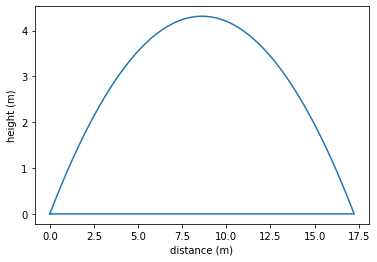

17.245839418394194


In [ ]:
# x: first colume of the postion array
# y: second colume of the position array
plt.xlabel('distance (m)')
plt.ylabel('height (m)')
plt.plot(pos[:,0], pos[:,1])
plt.show()
print(sx_max)

Define the projectile function

In [ ]:
def projectile(u, theta, plot=False):
  # timestep length (small time period for earh loop)
  dt = 0.0001
  # number of timestep (number of iteration)
  N = 50000
  # acceleration vector
  acc = np.array([0, -9.8])

  sx_max = 0

  # calculate ux and uy
  ux = u * np.cos(theta/180 * np.pi)
  uy = u * np.sin(theta/180 * np.pi)

  # 2D array for storing x, y of each timestep
  pos = np.zeros((N+1, 2)) 
  vel = np.zeros((N+1, 2))
  # first row: inital position and velocity
  pos[0] = np.array([0,0])
  # vel[0] = [Ux, Uy] = [U_COS_theta, U_SIN_theta]
  vel[0] = np.array([ux, uy])

  # Use Euler's method
  for i in range (0, N):
    vel[i+1] = vel[i] + acc * dt
    pos[i+1] = pos[i] + vel[i] * dt
    if pos[i+1, 1] <= 0:
      sx_max = pos[i+1, 0]
      break

  # Plot the graph
  if plot:
    plt.xlabel('distance (m)')
    plt.ylabel('height (m)')
    plt.plot(pos[:,0], pos[:,1])
    plt.show()
    print(sx_max)

  return sx_max

Vary u and plot

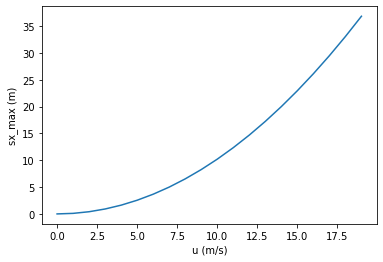

In [ ]:
theta = 45
n = 20
sx_max = []

for u in range(n):
  sx_max.append(projectile(u,theta))

plt.xlabel('u (m/s)')
plt.ylabel('sx_max (m)')
plt.plot(range(n),sx_max)
plt.show()

Vary theta and plot

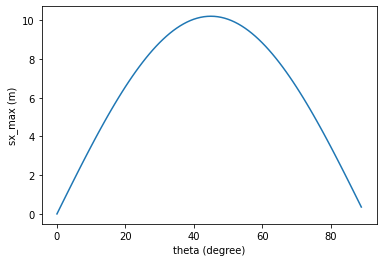

In [ ]:
u = 10
n = 90
sx_max = []

for theta in range(n):
  sx_max.append(projectile(u,theta))

plt.xlabel('theta (degree)')
plt.ylabel('sx_max (m)')
plt.plot(range(n),sx_max)
plt.show()

# Projectile with Euler's method + Air Resistance
Defined function that calcualte projectile with air resistance using Euler's method

In [10]:
import math
import numpy as np

def projectileWithAirResistance(dt, N, u, theta, m, b, order):
  # dt: timestep length (small time period for earh loop)
  # N: number of timestep (number of iteration)
  # u: inital velocity
  # theta: angle of projectile in degree
  # m: mass in gram
  # b: air resistance
  # order: order of air resistance
  # acceleration vector

  # gravity -> ay = -9.8
  g = np.array( [0, -9.8] )

  sx_max = 0

  # calculate ux and uy
  ux = u * np.cos(theta/180 * np.pi)
  uy = u * np.sin(theta/180 * np.pi)

  # 2D array for storing x, y of each timestep
  pos = np.zeros((N+1, 2)) 
  vel = np.zeros((N+1, 2))

  # first row: inital position and velocity
  pos[0] = np.array([0,0])
  # vel[0] = [Ux, Uy] = [U_COS_theta, U_SIN_theta]
  vel[0] = np.array([ux, uy])

  # because of air resistance -> acceration is not a constant  anymore
  # need to be compute on every iteration
  acc = np.zeros( (N+1, 2) ) 

  # calculated as magniture of velocity 
  speed = math.sqrt(vel[0,0]**2 + vel[0,1]**2)
  # calcate acceration at initial time
  acc[0] = -(b/m)*(speed**(order-1))*vel[0] 

  # Use Euler's method
  for i in range (0, N):
    vel[i+1] = vel[i] + acc[i]*dt
    pos[i+1] = pos[i] + vel[i] * dt
    speed = (vel[i,0]**2 + vel[i,1]**2)**0.5
    acc[i+1] = -(b/m)*(speed**(order-1))*vel[i] + g 
    if pos[i+1, 1] <= 0:
      sx_max = pos[i+1, 0]
      break

  return pos

Run the calculation with animation

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

# run a projectileWithAirResistance(dt,N,u,theta,m,b,order)
dt = 0.0002
N = 15000
skip = 100
pos = projectileWithAirResistance(dt,N,30,45,1,0.1,2)

# set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots( figsize=(8, 4) )
plt.close()
ax.set_xlim((0, 20))
ax.set_ylim((0, 10))
plots, = ax.plot([], [], 'k.', markersize=50)
trace, = ax.plot([], [], 'b--')
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
stepsize = int(1/dt)

# animation function. This is called sequentially  
def animate(i):
    plots.set_data(pos[skip*i,0], pos[skip*i,1])
    trace.set_data(pos[:skip*i,0], pos[:skip*i,1])
    time_text.set_text('time = %.1f s' % (i*dt))
    return plots, trace, time_text

anim = animation.FuncAnimation(fig, animate, 
                         frames=int(N/skip), interval=1000*skip*dt, blit=True)
rc('animation', html='jshtml')
anim

Vary the mass and plot their projectile

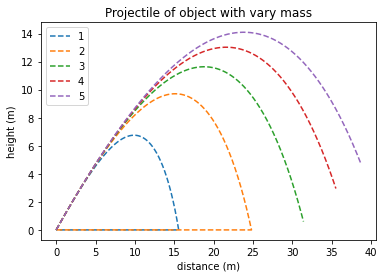

In [26]:
import numpy as np
import matplotlib.pyplot as plt

dt = 0.0002
N = 15000
skip = 100

# run a projectileWithAirResistance(dt,N,u,theta,m,b,order) with vary mass 
for i in range(1, 6):
  # use i from 1 to 5 as mass
    pos = projectileWithAirResistance(dt, N, 30, 45, i, 0.1, 2)
    # plot the graph of projectile
    plt.plot( pos[:,0], pos[:,1], ls='--', label=i )
    plt.legend()

plt.title('Projectile of object with vary mass')
plt.xlabel( 'distance (m)' )
plt.ylabel( 'height (m)' )
plt.show()


Vary the co-efficience and plot their projectile

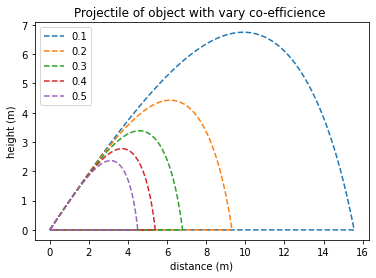

In [27]:
import numpy as np
import matplotlib.pyplot as plt

dt = 0.0002
N = 15000
skip = 100

# run a projectileWithAirResistance(dt,N,u,theta,m,b,order) with vary co-efficience 
for i in range(1, 6):
    # use i/10 (0.1 to 0.5) as co-efficience
    pos = projectileWithAirResistance(dt, N, 30, 45, 1, i/10, 2)
    # plot the graph of projectile
    plt.plot( pos[:,0], pos[:,1], ls='--', label=i/10 )
    plt.legend()

plt.title('Projectile of object with vary co-efficience ')
plt.xlabel( 'distance (m)' )
plt.ylabel( 'height (m)' ) 
plt.show()

# Discussion
1. According to formula (6), the force of an object is increased by mass which is varied, however, the air resistance is constant since it is not affected by change of mass. Therefore, the force of object would increase and make it travel more distance.

2. Coefficient - According to formula (6), the force of an object would be constant since the co-efficient of air resistance does not affected it. The force of air resistance, however, would be increased by the increment of co-efficient. Therefore, the force of the object would be lower due to the larger force of air resistance.
